In [1]:
import pandas as pd
from pandas import DataFrame
from main import get_data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DECIMAL_POINTS = 5

In [3]:
data = get_data()

# 3a

Here we calculate the retention rates for customers in cohort 0 for each month.
The retention rate for a contractual period is the amount of customers that stayed at the end of the contractual period divided by the amount of customers that were in at the start of the contractual period

We did this in two ways with the same result:

## Alex' solution

In essence, this solution uses the 2 lists of all users at the start and end of the given contractual period and checks how many from the first list that are still in the second list

In [4]:
def get_unique_users_for_month(data: DataFrame, month: int) -> list[int]:
    # Filter the DataFrame for the given month
    filtered_df = data[data['time_month '] == month]

    # Get unique users
    unique_users = filtered_df['user  '].unique()

    return list(unique_users)

def get_retention_rate(data: DataFrame, month_ended_number: int) -> float:
    continuing_customers = 0
    customer_base_0 = get_unique_users_for_month(data, month_ended_number-1)
    new_customer_base = get_unique_users_for_month(data, month_ended_number)
    
    if len(customer_base_0) == 0:
        return np.NaN
    for i in customer_base_0:
        if i in new_customer_base:
            continuing_customers += 1
    return round(continuing_customers/len(customer_base_0),DECIMAL_POINTS)

def get_all_retention_rates(data: DataFrame) -> list[float]:
    retention_rates = []
    for i in range(0,12):
        retention_rates.append(get_retention_rate(data, i))
    return retention_rates

def get_all_retention_rates_for_cohort(data: DataFrame, cohort_number: int) -> list[float]:
    cohort_data = data[data['cohort '] == cohort_number]
    return get_all_retention_rates(cohort_data)

In [5]:
print(get_all_retention_rates_for_cohort(data, 0))

[nan, 0.46086, 0.07397, 0.2963, 0.0625, 0.0, nan, nan, nan, nan, nan, nan]


## Ida's solution

In [6]:
def get_retention_rates(index : int):
    customers_left = data[data['cohort '] == index].groupby('time_month ').size().values.tolist()
    retention_rates = []
    #Putting zeros where retention rates are N/A
    for i in range(1,len(customers_left)):
        retention_rates +=[customers_left[i]/customers_left[i-1]] 
    if index <10: 
        retention_rates += [0]
    retention_rates = retention_rates + [np.NaN]*(12 -len(retention_rates))
    return retention_rates

In [7]:
print(get_all_retention_rates_for_cohort(data,0))

[nan, 0.46086, 0.07397, 0.2963, 0.0625, 0.0, nan, nan, nan, nan, nan, nan]


# 3b

In [8]:
def plot_month_bars(data: list[float], ylabel):
    # data = data + [0]*(12-len(data))
    for element in data:
        if np.isnan(element):
            data[data.index(element)] = 0
    t = np.linspace(0,12,12)
    plt.figure(figsize=(12,6))
    bars = plt.bar(t, data )
    # tick_label=["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb"]

    for bar in bars:
        height = round(bar.get_height(), 4)
        if height != 0:
            plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

    plt.xlabel("Month")
    plt.ylabel(ylabel)
    plt.show()

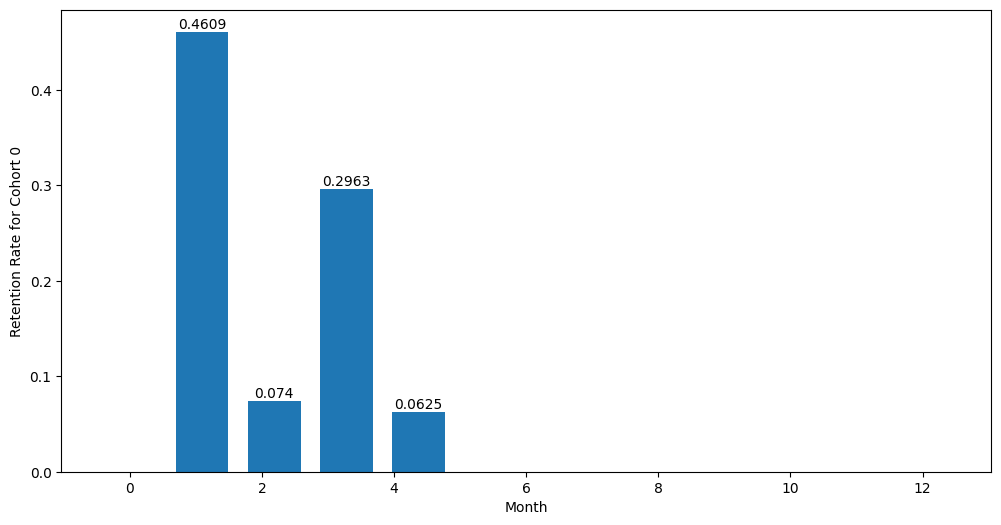

In [9]:
plot_month_bars(get_all_retention_rates_for_cohort(data, 0),'Retention Rate for Cohort 0')

The plot shows that almost half of the initial users that signed up in March stayed for another month. However after April, not many stayed into May. But of the ones that stayed and has used Netflix for 3 months, almost 30% chose to stay for June, and then again the retention rate drops between June-July, and after July there are none left of the users that signed up in March.

# 3c

Here we underline that when the start of the contractual period had 0 users, then the retention rate is $\frac{0}{0}$ and we define this as $NaN$ (Not a Number). These values will not affect the average

In [10]:
def get_avg_retention_rate(cohort_number : int):
    retention_rates = np.array(get_all_retention_rates_for_cohort(data,cohort_number=cohort_number))
    return np.nanmean(retention_rates)

In [11]:
print(get_avg_retention_rate(0))

0.178726


# 3d

According to [Zippia](https://www.zippia.com/advice/netflix-statistics/), Netflix is reporting a six-month retention rate of 72%. The reason for this rate being so much higher than what we are seeing is because of the time granularity. We are calculating the rate on a month-to-month basis while this rate is six months. 
In other words, these calculations are done on customers that have already stayed for 6 months straight, i.e. fairly loyal customers, as we did not have any customer left from cohort 0 after 6 months

In addition, our dataset includes only desktop and laptop activity. It may be that users have started out using desktop or laptop and then moved over to another device. Our retention rates see the device switching as churn, while Netflix and their reported retention rates do not

However, according to [Derived From Data News](https://dfdnews.com/2022/03/22/streaming-services-see-slightly-higher-customer-retention-with-ad-free-plans/) Netflix has a monthly retention rate of 83%. Here we have an argument similar to the one above. This retention rate seems to use the whole customer base for the calculation and not just the users acquired at the start of the respective month. And the whole customer base does of course include customers that have been with Netflix for longer than a month, maybe even years. Official retention rates when Netflix was launched should according to this argument be more similar to the ones we have found.

# 3e

For this, we simply repeat [3a](#3a) for the remaining cohorts

In [12]:
for i in range(12):
    all_retention_rates_for_cohort = (get_all_retention_rates_for_cohort(data,i))
    avg = get_avg_retention_rate(i)
    print(all_retention_rates_for_cohort, "Avg:", round(avg,5))

[nan, 0.46086, 0.07397, 0.2963, 0.0625, 0.0, nan, nan, nan, nan, nan, nan] Avg: 0.17873
[nan, nan, 0.54389, 0.17009, 0.03256, 0.57143, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0] Avg: 0.6318
[nan, nan, nan, 0.41914, 0.0173, 0.4, 0.5, 0.0, nan, nan, nan, nan] Avg: 0.26729
[nan, nan, nan, nan, 0.16442, 0.09179, 0.36842, 0.14286, 1.0, 1.0, 0.0, nan] Avg: 0.39536
[nan, nan, nan, nan, nan, 0.46653, 0.32477, 0.18605, 0.65, 0.76923, 0.8, 0.0] Avg: 0.45665
[nan, nan, nan, nan, nan, nan, 0.49938, 0.12438, 0.28713, 0.58621, 0.58824, 0.1] Avg: 0.36422
[nan, nan, nan, nan, nan, nan, nan, 0.72487, 0.08832, 0.24793, 0.63333, 0.26316] Avg: 0.39152
[nan, nan, nan, nan, nan, nan, nan, nan, 0.70762, 0.10572, 0.24771, 0.25926] Avg: 0.33008


[nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.45937, 0.16387, 0.14773] Avg: 0.25699
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.43531, 0.03075] Avg: 0.23303
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.43258] Avg: 0.43258
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan] Avg: nan


/var/folders/d7/j_29bjyn0_lbt66yfhsy0pf00000gp/T/ipykernel_11415/186341376.py:3: RuntimeWarning: Mean of empty slice
  return np.nanmean(retention_rates)


The final retention rate we cannot find, since we do not have data for the month after the final month

# 3f

Here, we perform an analysis of the retention rates across cohorts.
We try to plot bars for the retention rate of each month for each cohort, and then finally we compare the retention rates for all cohorts in one line plot by normalizing the times so that all start at month 0 and set the initial retention rate to 1 instead of NaN to get a more accurate visual

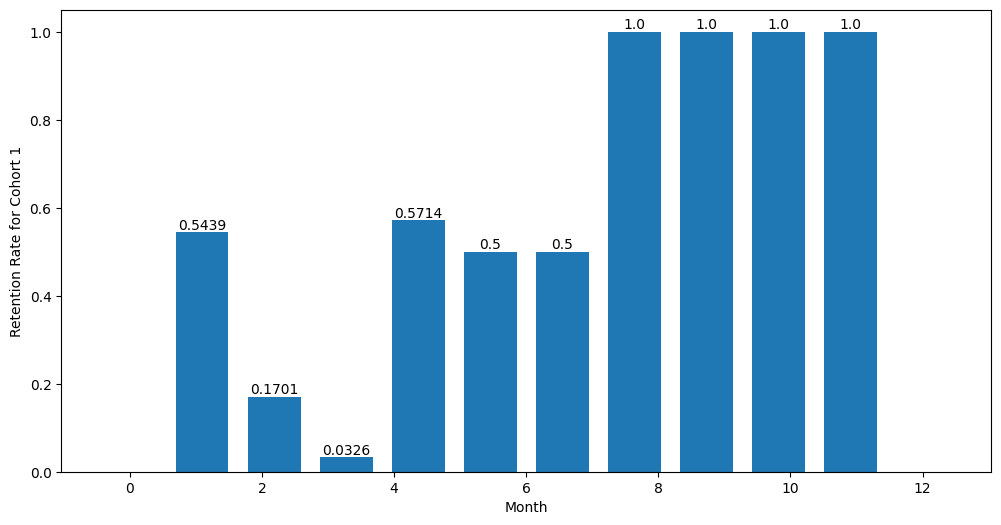

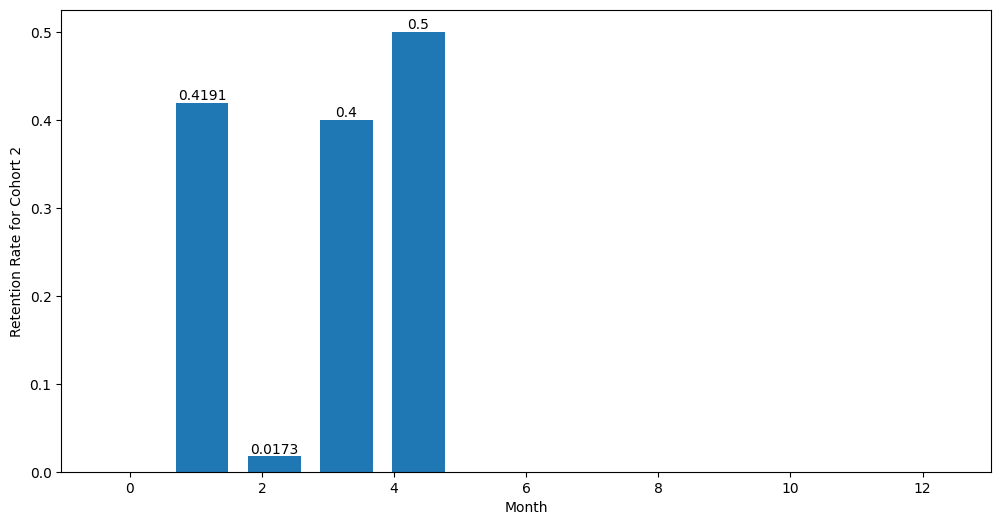

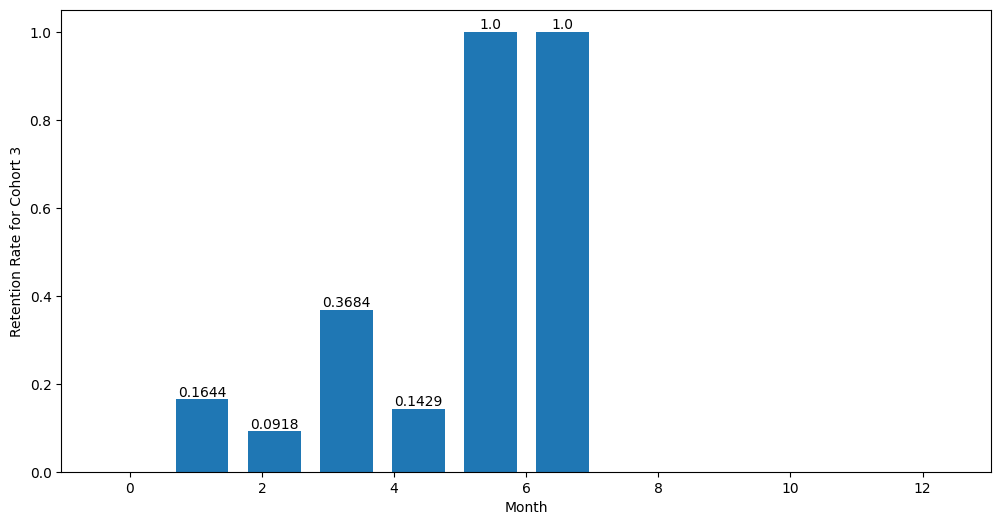

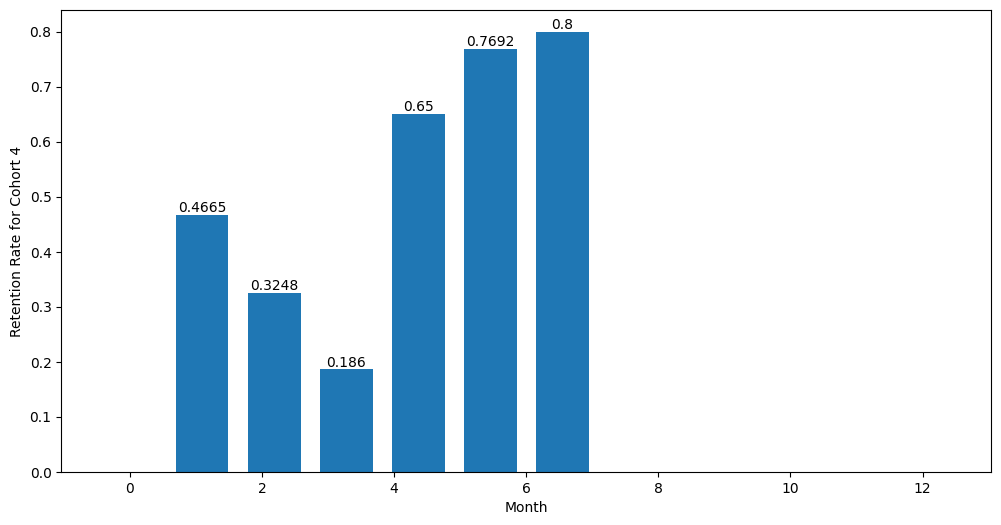

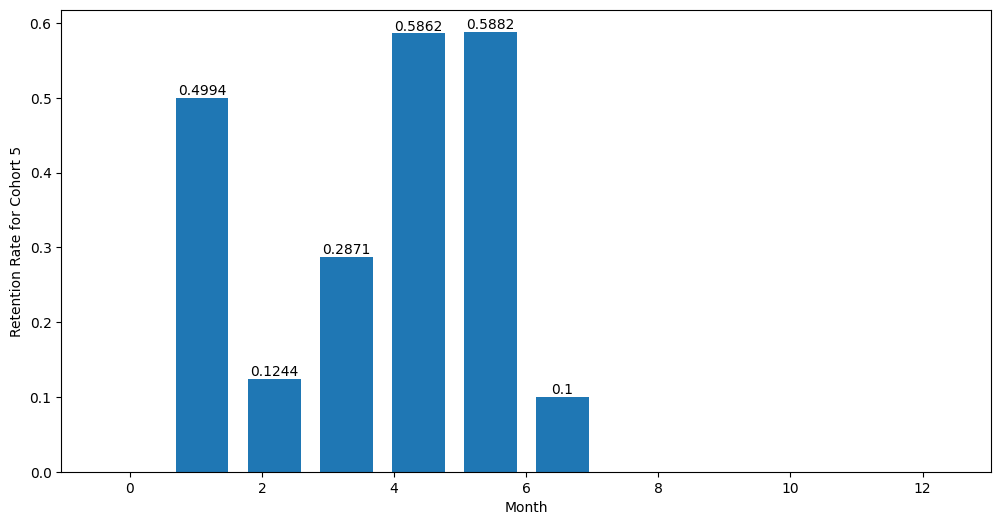

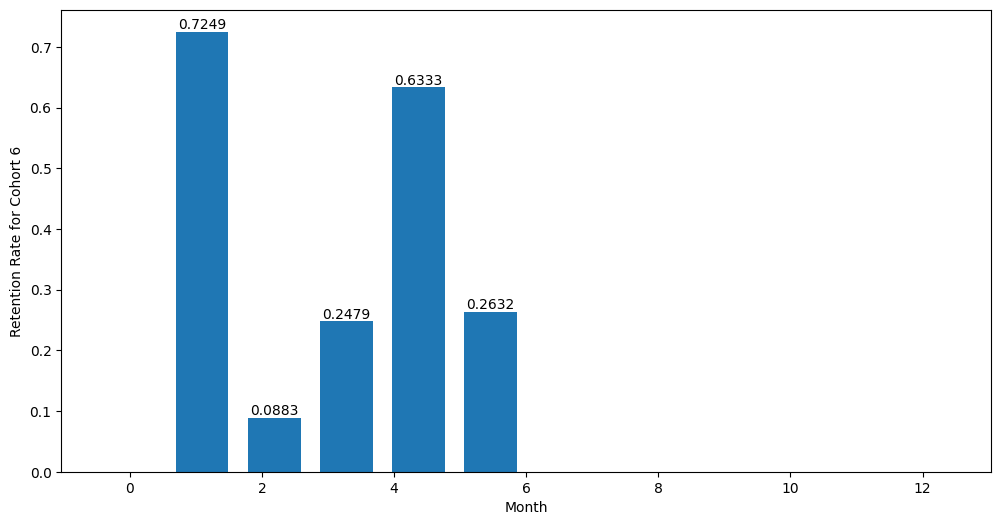

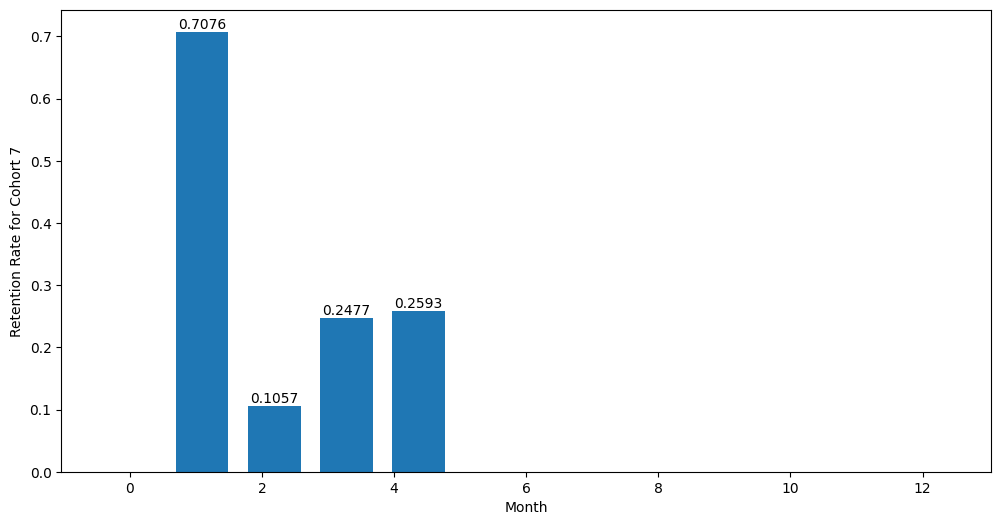

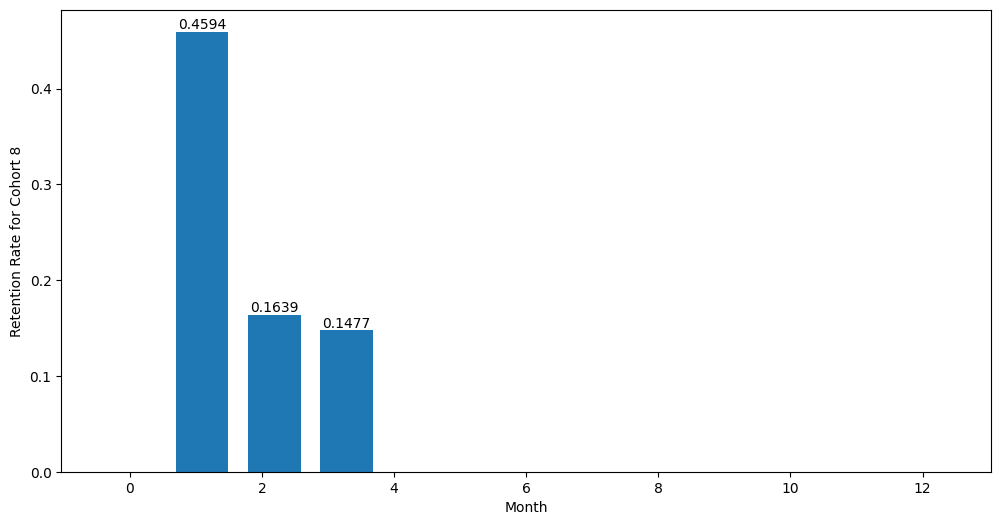

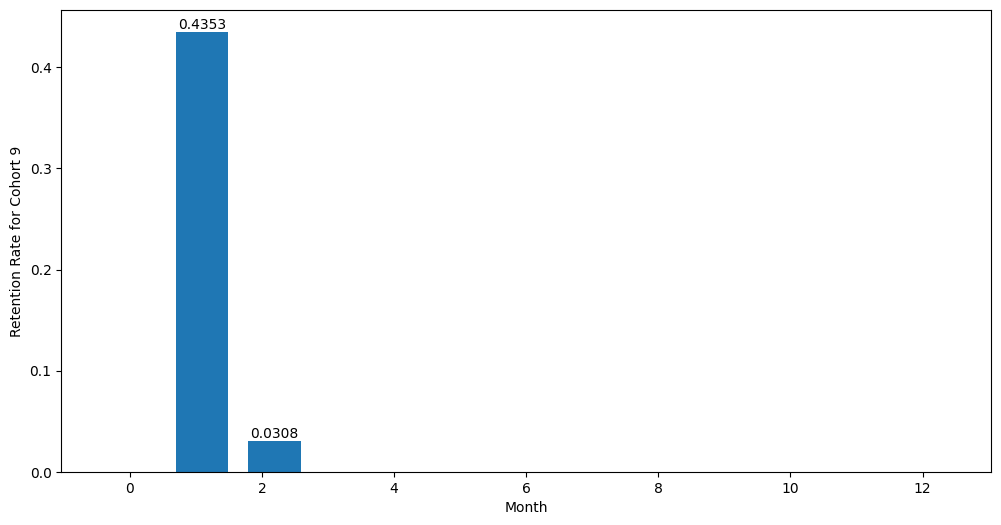

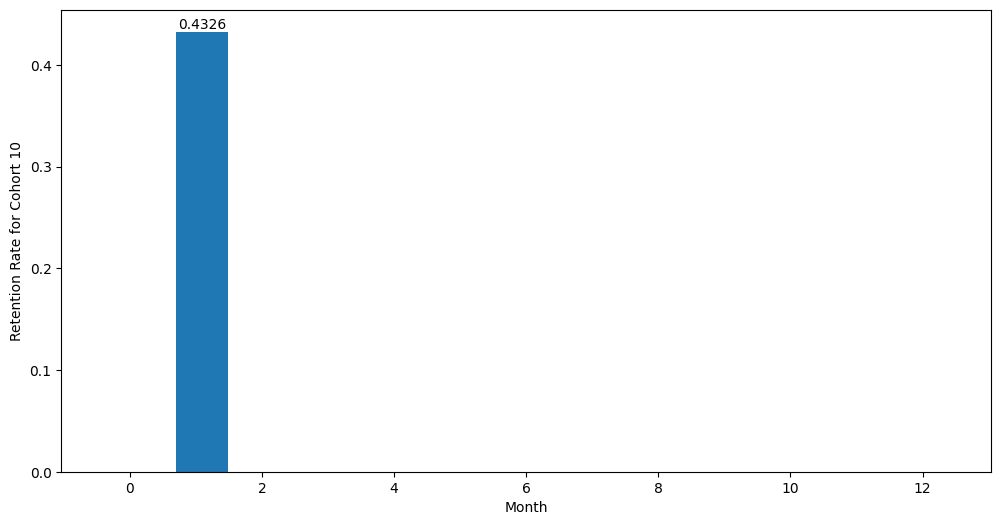

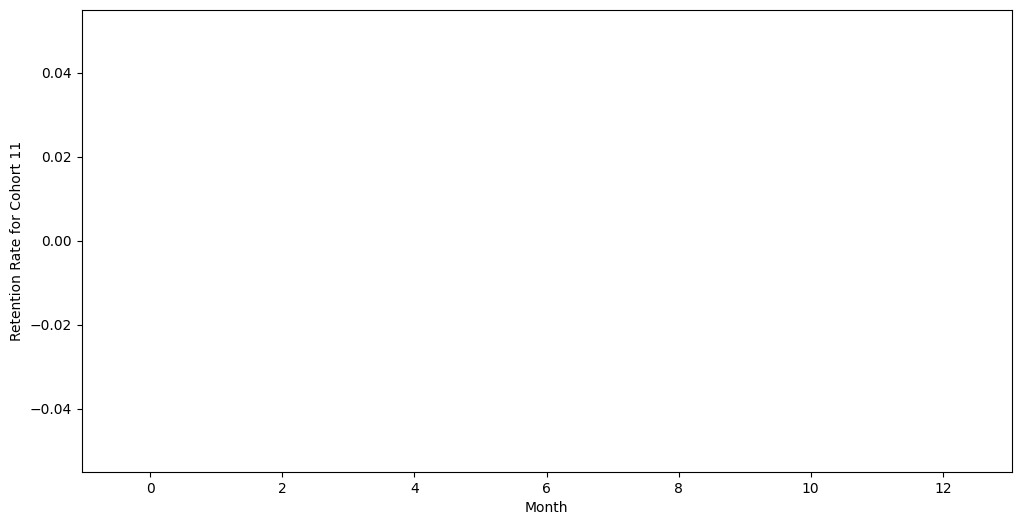

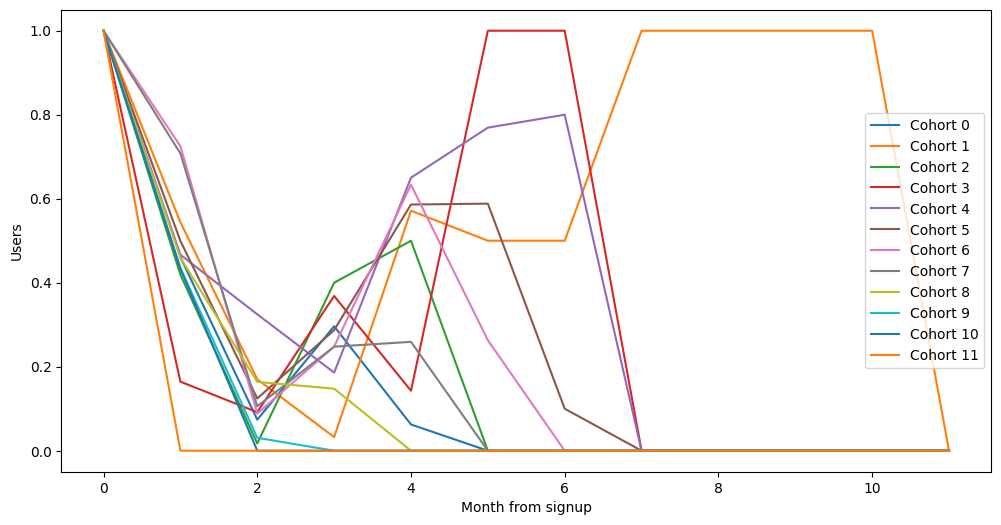

In [13]:
retention_rates_all_cohorts = []
for i in range(12):
    all_retention_rates_for_cohort = (get_all_retention_rates_for_cohort(data,i))
    retention_rates_all_cohorts.append(all_retention_rates_for_cohort)
    # plot_month_bars(all_retention_rates_for_cohort, f'Retention Rate for Cohort {i}')
# Time normalizing
for retention_rates in retention_rates_all_cohorts:
    for i in range(retention_rates_all_cohorts.index(retention_rates),len(retention_rates)):
        retention_rates[i-retention_rates_all_cohorts.index(retention_rates)] = retention_rates[i]
        retention_rates[i] = np.NaN
for i in range(1,12):
    plot_month_bars(retention_rates_all_cohorts[i], f'Retention Rate for Cohort {i}')

t = np.linspace(0,11,12)
plt.figure(figsize=(12,6))
plt.plot(t, get_all_retention_rates_for_cohort(data, 0), label="Cohort 0")

for i in range(1,12):
    retention_rates_all_cohorts[i][0] = 1
    plt.plot(t, retention_rates_all_cohorts[i], label=f"Cohort {i}")

plt.xlabel("Month from signup")
plt.ylabel("Users")
plt.legend()
plt.show()

In the above graph, one clarification must be made: Most lines are dropping to zero because of the stop in data, so they actually drop down to a NaN value and is therefore not 0. This is also seen because the cohorts drop in turn according to their number.

So we see two main observations. The drop in retention rate is pretty linear from month 0 to 2 where most of the retention rates are at the lowest. After this, we see an increasing trend, which suggests that customers get more loyal and loyal, i.e. a customer is more likely to stay for another month the more months they have already been subscribed. This is not the case for all cohorts, like 0, 2, 3. The data is a little bit noisy because the amount of users that have stayed after 4-5 months is pretty small. So if there's 1 customer that have stayed some months, and then unsubscribes this shows as a drop from 1.0 to a 0 retention rate

# 3g
Done as an average of cells in Excel
# 3h
Done as an average of cells in Excel

# 3i

The question of which method to calculate retention rates really depends on what we want to study in the behavior of our customers. 

## A) Cohort-wise retention rates

### 1. Average retention rate of each cohort
One of the methods, namely calculating the average retention rate for a cohort gives a better view on how seasonal changes affect the retention of customers, i.e. which cohorts are more likely to stay. At the same time it is a bit unaccerate as a smaller sample size for the latter months for each cohort have a big impact on the retention rate. For example 1 customer that stays for 6 months out of only himself will give a retention rate of 1, for each month giving a huge impact on the average. But it of course also takes into account all the new customers that curned after only one month. In summary the method of calculating retention rates for each cohort could be used to see the seasonal effects, but at the same time a small sample size that deviates from the average can really skew the rate.

### 2. Retention rates each month for a cohort

The method of calculating a retention rate for each month gives more insight in how the customers behave for the contractual service, and makes it easier to explain based on season and the amount of months that a customer has already stayed with the service. Doing this, we can see the trends of users churning heavily at first, and then loyalty increases with longer-staying customers. The weakness with this method is the shorter granularity which is what skews the averages of method 1 a lot.

## B) Month after acquisition retention rates

This way of calculating retention rates does not see at the seasonal impacts, but focuses on how many months the customers have stayed with the provider. It also incorporates a higher, more accurate measurement since it averages across all cohorts. Plotting a graph of these retention rates gives an accurate visual of how customer loyalty looks like. 

Then taking the average of these rates gives one accurate number that providers could use as a key metric. For our dataset, all our customers are however acquired during the given time period, and we do not see customers that were acquired before and have still stayed. Because of this, the average retention rate of 0.57 is lower than the one that different streaming providers report.